# PCA for Customer Table -- Numerical ONLY

In [4]:
import numpy as np
import pandas as pd

### Customer Table: Scaled Numerical and Categorical Analysis
* all features selected are scaled
* dropped cities
* dropped states

In [5]:
# Import updated merged customer numerical and categorical analysis table

df_numcat_cust_scaled = pd.read_csv("Numerical_Categorical_Analysis_Customer_SCALED.csv", index_col=False)
df_numcat_cust_scaled.head()

,cust_id,income,age,years_with_bank,nbr_children,is_male,M_1_single,M_2_married,M_3_divorced,M_4_widowed
0,1362691,0.181399,0.434211,0.555556,0.2,1,0,1,0,0
1,1362487,0.045818,0.763158,0.111111,0.0,1,0,1,0,0
2,1363160,0.128665,0.328947,0.888889,0.0,0,1,0,0,0
3,1362752,0.330667,0.539474,0.333333,0.0,0,1,0,0,0
4,1362548,0.309066,0.605263,1.000000,0.4,0,0,0,0,1


In [6]:
# drop customer id

df_numcat_cust_scaled = df_numcat_cust_scaled.drop(['cust_id', 'is_male', 'M_1_single', 'M_2_married', 'M_3_divorced', 'M_4_widowed'], axis=1)
df_numcat_cust_scaled

,income,age,years_with_bank,nbr_children
0,0.181399,0.434211,0.555556,0.2
1,0.045818,0.763158,0.111111,0.0
2,0.128665,0.328947,0.888889,0.0
3,0.330667,0.539474,0.333333,0.0
4,0.309066,0.605263,1.000000,0.4
...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2
743,0.183043,0.565789,0.666667,0.2
744,0.425231,0.486842,0.000000,0.4
745,0.104747,0.315789,0.777778,0.0


## PCA

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

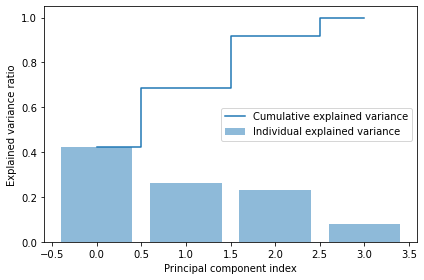

In [8]:
# Instantiate PCA

pca = PCA()

# Determine PCA transformed features

pca_datatrans = pca.fit_transform(df_numcat_cust_scaled)

# Determine explained variance using explained_variance_ration_ attribute

exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# saving PCA components to a dataframe
df_pca_datatrans = pd.DataFrame(pca_datatrans)

# Create the visualization plot

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [619]:
# # Scree plot

# PC_values = np.arange(pca.n_components_) + 1
# plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
# plt.title('Scree Plot')
# plt.xlabel('Principal Component')
# plt.ylabel('Variance Explained')
# plt.show()

[0.4235364  0.68720803 0.91868831 1.        ]


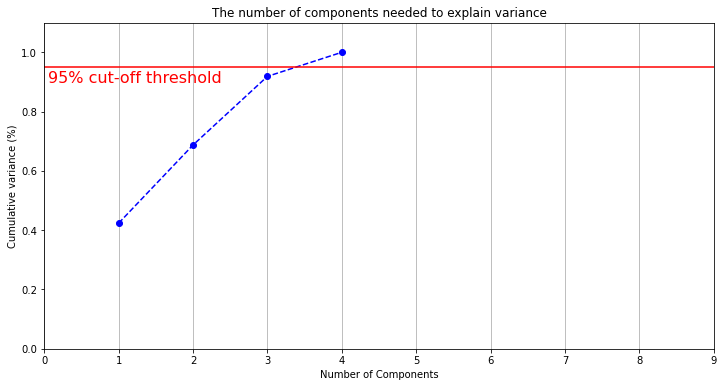

In [13]:
# pca = PCA().fit(df_numcat_cust_scaled)

%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 5, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

print(y)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 10, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.05, 0.90, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [15]:
# Choosing top 3 PCs which gives ~91 % of variance
pca_datatrans_top3 = pca_datatrans[:,:3]
pca_datatrans_top3

array([[ 0.12743959, -0.00318717,  0.06644747],
       [-0.13614436,  0.43658394, -0.22031885],
       [ 0.39334358, -0.25311719, -0.10740165],
       ...,
       [-0.34785059,  0.33604658,  0.2864255 ],
       [ 0.28561996, -0.22342228, -0.12162253],
       [-0.21906423, -0.25276283, -0.12892468]])

## k-means clustering

In [16]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [17]:
def plot_distortion(X,max_clusters = 20):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

### Elbow Rule

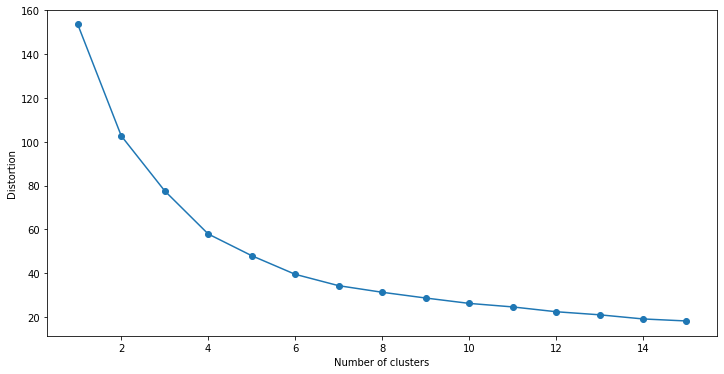

In [34]:
# elbow rule

plot_distortion(pca_datatrans_top3, 15)

In [623]:
# #Plot Elbow Curve to determine number of clusters

# from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer
# from sklearn import metrics

# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(1,11), timings=False)

# visualizer.fit(pca_datatrans_top4)
# visualizer.show()

In [395]:
# plt.scatter(pca_datatrans[:,0], pca_datatrans[:,1], alpha=.1, color='black')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')

### Alternative to Elbow Rule: Silouette Analysis on KMeans Clustering
This is an alternative to the elbow rule to choose the number of clusters.

For n_clusters = 2 The average silhouette_score is : 0.31039741721460645
For n_clusters = 3 The average silhouette_score is : 0.32520586036609994
For n_clusters = 4 The average silhouette_score is : 0.35801362780966656
For n_clusters = 5 The average silhouette_score is : 0.34449172980809606
For n_clusters = 6 The average silhouette_score is : 0.36078997060269224
For n_clusters = 7 The average silhouette_score is : 0.35747265928981975


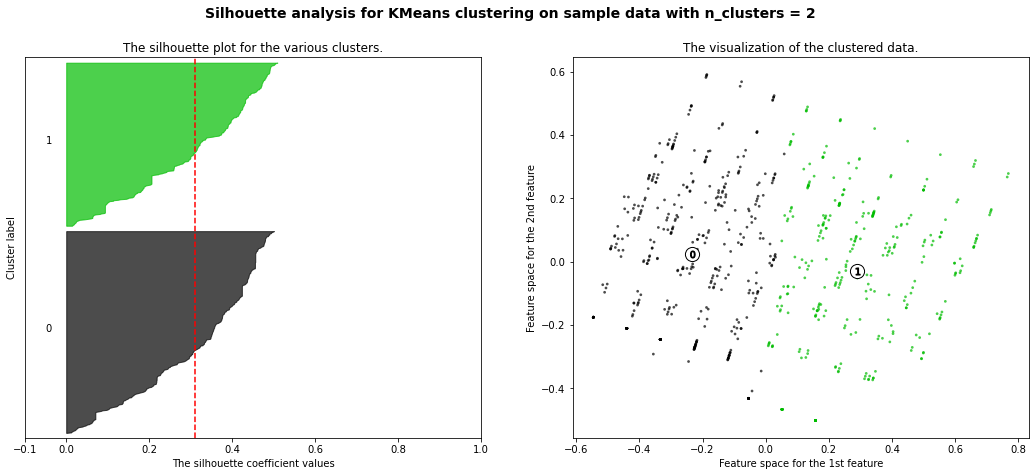

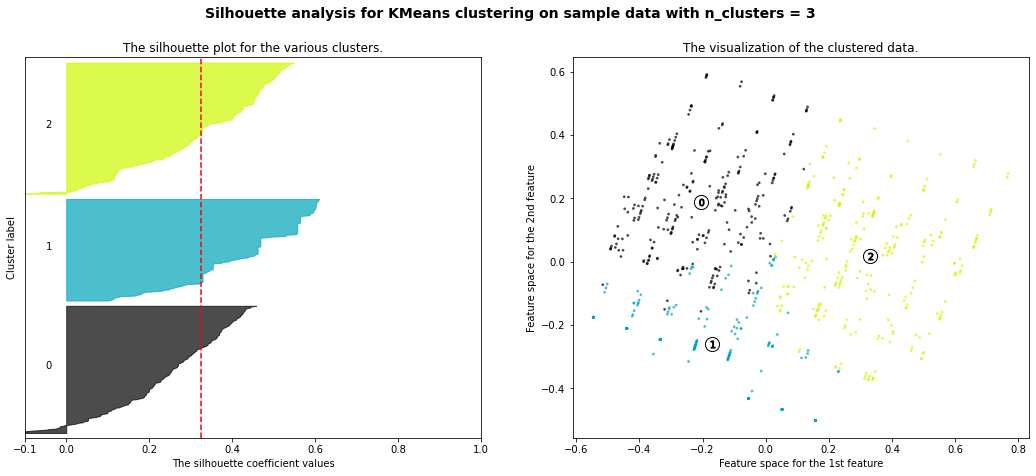

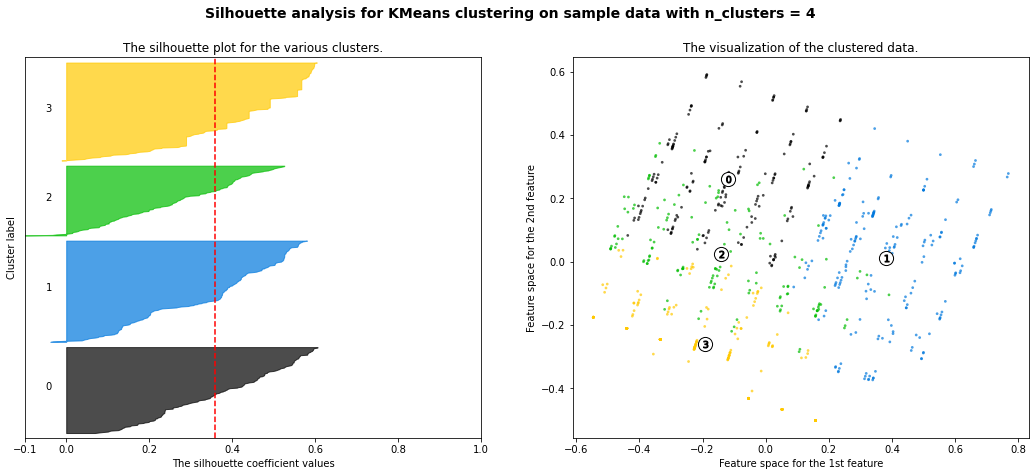

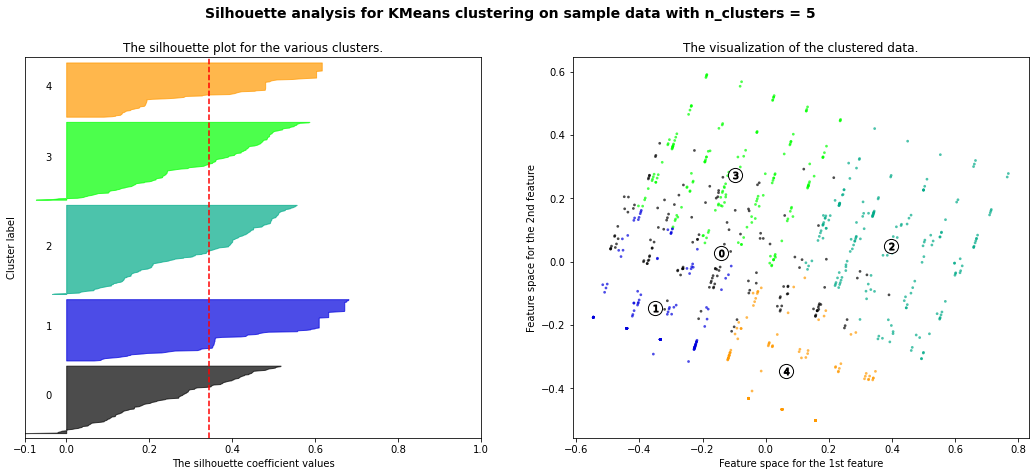

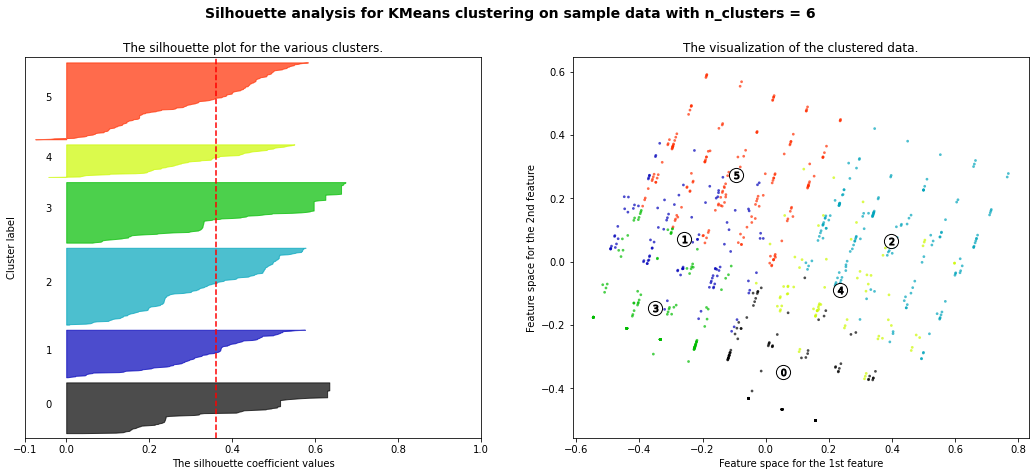

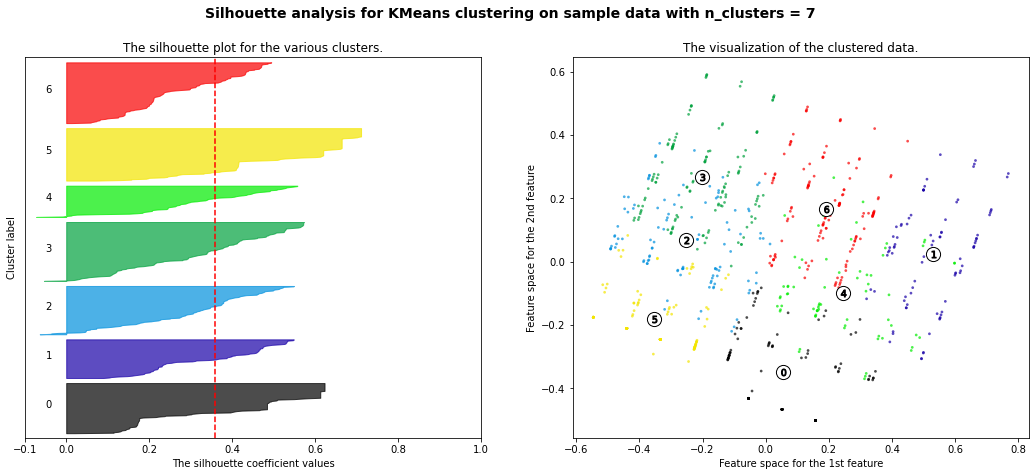

In [58]:
# Silouette for kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7]

X = pca_datatrans_top3    # the top 3 PCs 

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

The above silhouette analysis on kmeans clustering shows that 6 clusters is ideal.

## Build model for prediction

In [35]:
km_labels = KMeans(n_clusters = 4, # how many clusters we expected 
            n_init=30,   # how many initial runs
            random_state=0)

In [36]:
# fit and predict
y_km_labels = km_labels.fit_predict(pca_datatrans_top3) # use top 3 components  #pca_datatrans[:,:3]

In [37]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    fig = plt.figure()

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                   y,
                   s=50,
                   marker='s',
                   label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                   Y_centroids,
                   marker='*',
                   c='black',
                   s=250,
                   label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

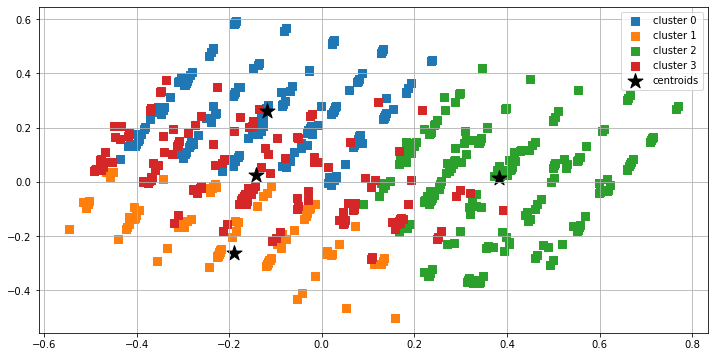

In [38]:
plot_clusters(pca_datatrans_top3, y_km_labels, plt_cluster_centers = True)

In [39]:
df_numcat_cust_scaled

,income,age,years_with_bank,nbr_children
0,0.181399,0.434211,0.555556,0.2
1,0.045818,0.763158,0.111111,0.0
2,0.128665,0.328947,0.888889,0.0
3,0.330667,0.539474,0.333333,0.0
4,0.309066,0.605263,1.000000,0.4
...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2
743,0.183043,0.565789,0.666667,0.2
744,0.425231,0.486842,0.000000,0.4
745,0.104747,0.315789,0.777778,0.0


## Radar Chart

In [40]:
df_radar2 = df_numcat_cust_scaled.loc[:, ['income', 'age', 'years_with_bank', 'nbr_children']]
df_radar2['Cluster'] = km_labels.labels_
df_radar2.head()


,income,age,years_with_bank,nbr_children,Cluster
0,0.181399,0.434211,0.555556,0.2,2
1,0.045818,0.763158,0.111111,0.0,0
2,0.128665,0.328947,0.888889,0.0,2
3,0.330667,0.539474,0.333333,0.0,0
4,0.309066,0.605263,1.000000,0.4,2


In [41]:
df_radar_grouped2 = df_radar2.groupby(['Cluster']).mean()
df_radar_grouped2

,income,age,years_with_bank,nbr_children
Cluster,,,,
0,0.178103,0.574876,0.209331,0.038674
1,0.049176,0.088912,0.361381,0.020388
2,0.195373,0.556709,0.773605,0.102347
3,0.229886,0.331991,0.321240,0.502041


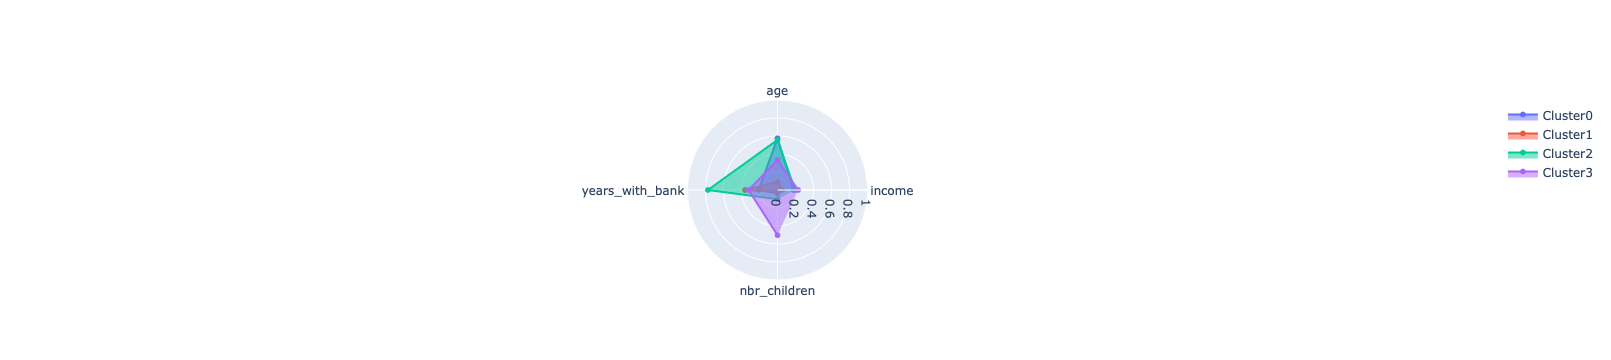

In [44]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots

column_names = df_radar_grouped2.columns.tolist()

fig = go.Figure()

for i in range(4):
    fig.add_trace(go.Scatterpolar(
      r=df_radar_grouped2.loc[i],
      theta=column_names,
      fill='toself',
      name='Cluster' + str(i)
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    ))
)    
    
fig.show()


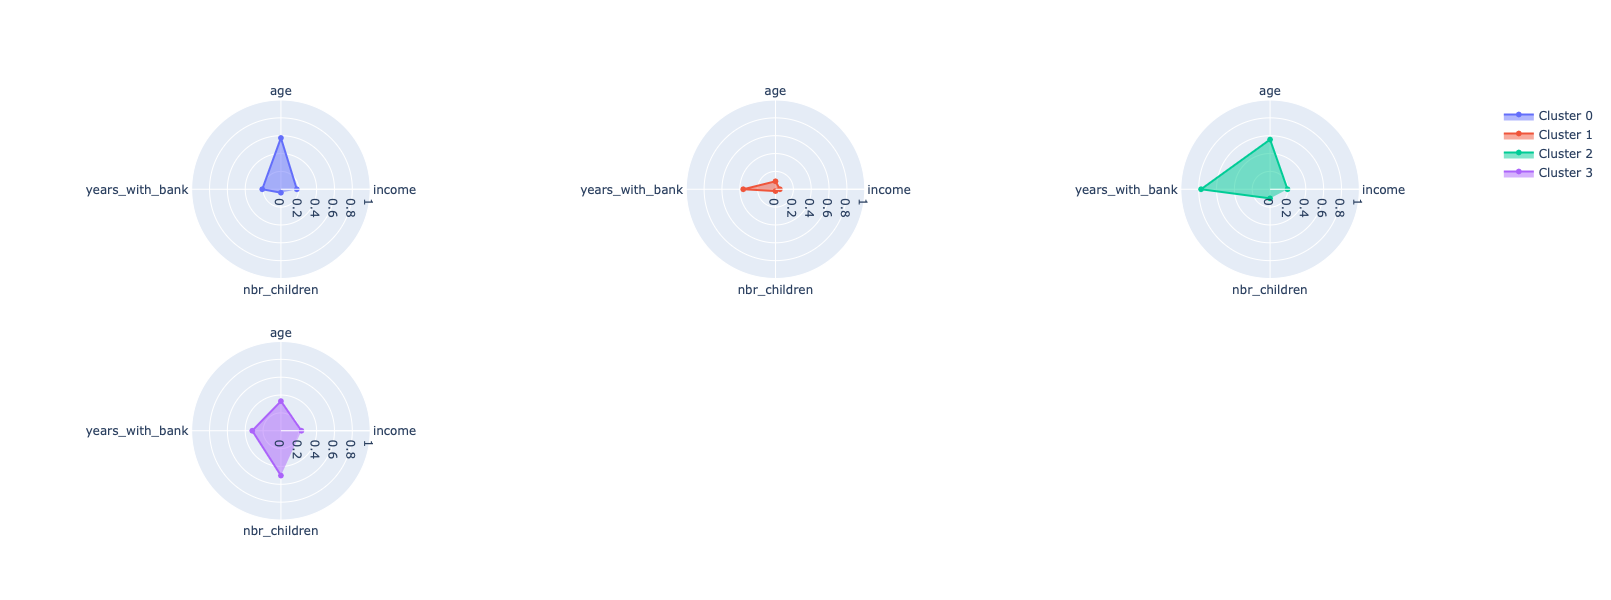

In [45]:
fig = make_subplots(rows=2, cols=3, specs=[[{'type': 'polar'}]*3]*2)

abbrev = df_radar_grouped2.columns.tolist()

n_clusters = 4

layoutdict = dict(
            radialaxis=dict(
            visible=True,
            range=[0, 1]
            ))

for i in range(n_clusters):
    fig.add_trace(go.Scatterpolar(
        r=df_radar_grouped2.loc[i],
        theta=abbrev,
        fill='toself',
        name="Cluster " + str(i)),
        i // 3 + 1,
        i % 3 + 1)
    
fig.update_layout(
        polar=layoutdict,
        polar2=layoutdict,
        polar3=layoutdict,
        polar4=layoutdict,
        polar5=layoutdict,
        polar6=layoutdict,
        showlegend=True
        )
fig.update_layout(height=600, width=1200)
fig.show()

In [635]:
# df_radar = df_numcat_cust_scaled.loc[:, ['income', 'age', 'years_with_bank', 'nbr_children', 'is_male']]
# df_radar['Cluster'] = km_labels.labels_
# df_radar

In [636]:
# df_radar_grouped = df_radar.groupby(['Cluster']).mean()
# df_radar_grouped

In [637]:
# import plotly.express as px
# import plotly.graph_objects as go
# import pandas as pd
# from plotly.subplots import make_subplots

# column_names = df_radar_grouped.columns.tolist()

# fig = go.Figure()

# for i in range(6):
#     fig.add_trace(go.Scatterpolar(
#       r=df_radar_grouped.loc[i],
#       theta=column_names,
#       fill='toself',
#       name='Cluster' + str(i)
# ))

# fig.update_layout(
#   polar=dict(
#     radialaxis=dict(
#       visible=True,
#       range=[0, 1]
#     ))
# )    
    
# fig.show()


In [638]:
# fig = make_subplots(rows=2, cols=3, specs=[[{'type': 'polar'}]*3]*2)

# abbrev = df_radar_grouped.columns.tolist()

# n_clusters = 6

# layoutdict = dict(
#             radialaxis=dict(
#             visible=True,
#             range=[0, 1]
#             ))

# for i in range(n_clusters):
#     fig.add_trace(go.Scatterpolar(
#         r=df_radar_grouped.loc[i],
#         theta=abbrev,
#         fill='toself',
#         name="Cluster " + str(i)),
#         i // 3 + 1,
#         i % 3 + 1)
    
# fig.update_layout(
#         polar=layoutdict,
#         polar2=layoutdict,
#         polar3=layoutdict,
#         polar4=layoutdict,
#         polar5=layoutdict,
#         polar6=layoutdict,
#         showlegend=True
#         )
# fig.update_layout(height=600, width=1200)
# fig.show()

## Scatter Plots
to visualize segmentations (used top 4 PCs)

In [47]:
df_pca_kmeans = pd.concat([df_numcat_cust_scaled.reset_index(drop=True), pd.DataFrame(pca_datatrans_top3)], axis=1)
n_comps = 3
df_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_pca_kmeans['Cluster'] = km_labels.labels_
df_pca_kmeans.head()

,income,age,years_with_bank,nbr_children,Component 1,Component 2,Component 3,Cluster
0,0.181399,0.434211,0.555556,0.2,0.127440,-0.003187,0.066447,2
1,0.045818,0.763158,0.111111,0.0,-0.136144,0.436584,-0.220319,0
2,0.128665,0.328947,0.888889,0.0,0.393344,-0.253117,-0.107402,2
3,0.330667,0.539474,0.333333,0.0,-0.007662,0.209884,-0.101283,0
4,0.309066,0.605263,1.000000,0.4,0.598096,-0.004817,0.313685,2


In [48]:
# scatter matrix plots each component of a df to one another
# pd.plotting.scatter_matrix(df_pca_kmeans, alpha=0.2)

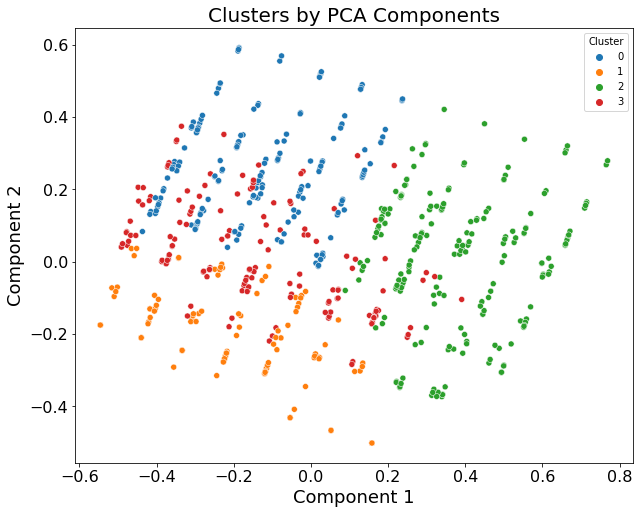

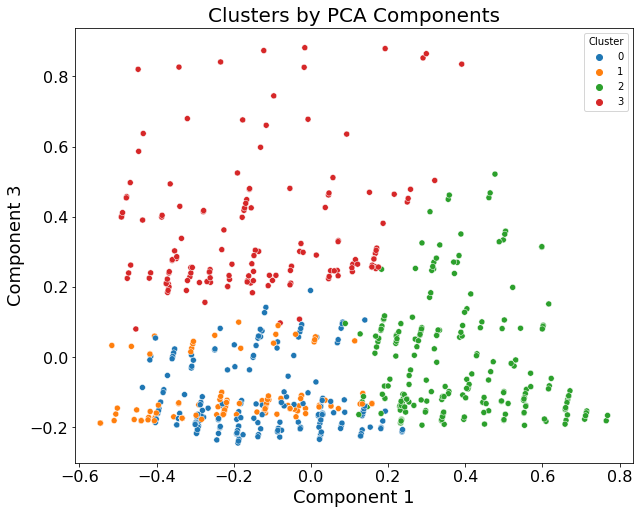

In [55]:
import seaborn as sns

x = df_pca_kmeans['Component 1']
y = df_pca_kmeans['Component 2']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x=x, y=y, hue=df_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
plt.title('Clusters by PCA Components', fontsize=20)
plt.xlabel("Component 1", fontsize=18)
plt.ylabel("Component 2", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

x = df_pca_kmeans['Component 1']
y = df_pca_kmeans['Component 3']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x=x, y=y, hue=df_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
plt.title('Clusters by PCA Components', fontsize=20)
plt.xlabel("Component 1", fontsize=18)
plt.ylabel("Component 3", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# fig.savefig("./visualizations/clusters-2d.png")

### A look of clusters in 3D

In [52]:
def plot_clusters_3D(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    Z_centroids = []
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        z = X[y_res == cluster,2]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        Z_centroids.append(np.mean(z))

        ax.scatter(x,
                    y,
                    z,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        ax.scatter(X_centroids,
                    Y_centroids,
                    Z_centroids,
                    marker='*',
                    c='black',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    ax.view_init(30, 30)
    plt.show()


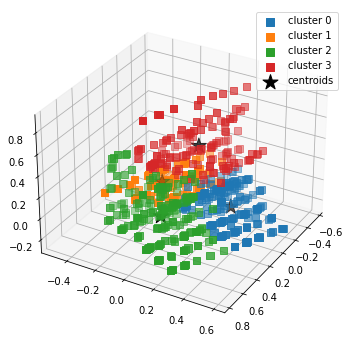

In [53]:
plot_clusters_3D(pca_datatrans_top3, y_km_labels, plt_cluster_centers= True)

In [56]:
# ctrs = km_labels.cluster_centers_
# print(ctrs)

In [57]:
# print(ctrs[4])
# print(ctrs[5])